In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Load the Cora dataset
cora_file_path = '../../result/RUN_FedPPN_layer_study_1108/layer_study_fedppn_on_cora_5_clients.csv'
cora_data = pd.read_csv(cora_file_path)

# Load the Citeseer dataset
citeseer_file_path = '../../result/RUN_FedPPN_layer_study_1108/layer_study_fedppn_on_citeseer_5_clients.csv'
citeseer_data = pd.read_csv(citeseer_file_path)

# Load the Citeseer dataset
pubmed_file_path = '../../result/RUN_FedPPN_layer_study_1108/layer_study_fedppn_on_pubmed_5_clients.csv'
pubmed_data = pd.read_csv(pubmed_file_path)

In [3]:
# Function to process the dataset and get the means and min/max for the shadow area
def process_data(data):
    grouped = data.groupby(['LP_layer', 'seed'])['test_ensemble_model_acc'].agg(['mean', 'min', 'max']).reset_index()
    pivot_df = grouped.pivot(index='LP_layer', columns='seed', values=['mean', 'min', 'max'])
    mean_of_means = pivot_df['mean'].mean(axis=1)
    overall_min = pivot_df['min'].min(axis=1)
    overall_max = pivot_df['max'].max(axis=1)
    return mean_of_means, overall_min, overall_max



In [4]:
# Process both datasets
cora_mean_of_means, cora_overall_min, cora_overall_max = process_data(cora_data)
citeseer_mean_of_means, citeseer_overall_min, citeseer_overall_max = process_data(citeseer_data)
pubmed_mean_of_means, pubmed_overall_min, pubmed_overall_max = process_data(pubmed_data)

In [5]:
cora_mean_of_means.values*100

array([74.0120416 , 77.27422003, 76.15763547, 70.02736727, 63.61247947,
       60.74438971, 57.67925561, 54.27476738, 55.54460865, 50.18062397])

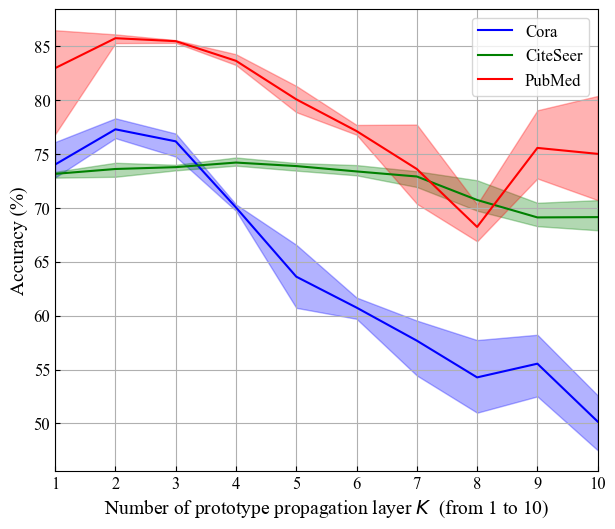

In [14]:
# Plotting both datasets
plt.figure(figsize=(7, 6))

plt.rcParams['axes.labelsize'] = 14  # 坐标轴标签字体
plt.rcParams['xtick.labelsize'] = 12 # X轴刻度字体
plt.rcParams['ytick.labelsize'] = 12 # Y轴刻度字体
plt.rcParams['legend.fontsize'] = 12 # 图例字体
plt.rcParams['font.family'] = 'Times New Roman' # Times New Roman字体
plt.tick_params(axis='both', direction='in')
plt.xlim(1, 10)  # x轴范围从1到10

# Plot the mean line for Cora
plt.plot(cora_mean_of_means.index, cora_mean_of_means.values*100, label='Cora', color='blue')
# Fill between the overall min and max values for Cora to create the shadow area
plt.fill_between(cora_overall_min.index, cora_overall_min.values*100, cora_overall_max.values*100, color='blue', alpha=0.3)

# Plot the mean line for Citeseer
plt.plot(citeseer_mean_of_means.index, citeseer_mean_of_means.values*100, label='CiteSeer', color='green')
# Fill between the overall min and max values for Citeseer to create the shadow area
plt.fill_between(citeseer_overall_min.index, citeseer_overall_min.values*100, citeseer_overall_max.values*100, color='green', alpha=0.3)

# Plot the mean line for PubMed
plt.plot(pubmed_mean_of_means.index, pubmed_mean_of_means.values*100, label='PubMed', color='red')
# Fill between the overall min and max values for Citeseer to create the shadow area
plt.fill_between(pubmed_overall_min.index, pubmed_overall_min.values*100, pubmed_overall_max.values*100, color='red', alpha=0.3)

# Setting the titles and labels
# plt.title('Comparison of Test Ensemble Model Accuracy for Cora and Citeseer Datasets')Aq1`
plt.xlabel('Number of prototype propagation layer $K$  (from 1 to 10)')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)


plt.savefig('plot.png', dpi=300, bbox_inches='tight')  # 剪切掉周围多余的空白
# Show the plot
plt.show()


In [8]:
citeseer_mean_of_means.index

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='LP_layer')